In [1]:
import itertools
import numpy as np
from numpy.random import choice 
import pandas as pd
import matplotlib.pyplot as plt
from numpy.lib.arraysetops import unique

### Пространство элементарных исходов, вероятностное пространство

При задании вероятностного пространства нужно задать три вещи — тройку $(\Omega, \Sigma, \mathbb P)$ — пространство элементарных исходов $\Omega$, множество событий $\Sigma$ и функцию вероятности $\mathbb P$. Давайте рассмотрим первое на примерах.

Пусть бросается монетка. **Мы сами вводим** пространство элементарных исходов (ПЭИ). Некоторые варианты (либо означает дизъюнктивное или): 
*   либо выпал орел, либо выпала решка
*   либо выпал орел, либо выпала решка, либо монета встала на ребро
*   либо выпал орел, либо выпала решка, либо монета встала на ребро, либо монета укатилась

**Модель вероятностного пространства — наше и только наше решение.** 

Относительно бросания монетки, будем рассматривать первый вариант ПЭИ.

**Задача.** 

Поочередно подбрасывается три монетки (одна монетка подбрасывается три раза). Описать ПЭИ

In [2]:
one_coin = ('О', 'Р')

three_coins = set()

for c1 in one_coin:
    for c2 in one_coin:
        for c3 in one_coin:
            three_coins.add((c1, c2, c3))

three_coins

{('О', 'О', 'О'),
 ('О', 'О', 'Р'),
 ('О', 'Р', 'О'),
 ('О', 'Р', 'Р'),
 ('Р', 'О', 'О'),
 ('Р', 'О', 'Р'),
 ('Р', 'Р', 'О'),
 ('Р', 'Р', 'Р')}

In [3]:
len(three_coins)

8

Итого, элементарных исходов ровно $2^3$.

Хочется немного автоматизировать перебор. Вдруг монеток станет, скажем, $100$? А если нужно решить задачу в общем случае? 

In [ ]:
many_coins = set(itertools.product(one_coin, one_coin))
many_coins

{('О', 'О'), ('О', 'Р'), ('Р', 'О'), ('Р', 'Р')}

In [13]:
number_of_coins = 3
many_coins = set(itertools.product(*[one_coin] * number_of_coins))

many_coins

{('О', 'О', 'О'),
 ('О', 'О', 'Р'),
 ('О', 'Р', 'О'),
 ('О', 'Р', 'Р'),
 ('Р', 'О', 'О'),
 ('Р', 'О', 'Р'),
 ('Р', 'Р', 'О'),
 ('Р', 'Р', 'Р')}

Нас могут интересовать только различные по составу исходы

In [ ]:
many_coins = set(itertools.combinations_with_replacement(one_coin, 3))
many_coins

{('О', 'О', 'О'), ('О', 'О', 'Р'), ('О', 'Р', 'Р'), ('Р', 'Р', 'Р')}

**Задача.**

Бросаются две обычные игральные кости. Сколько элементарных исходов, при которых сумма на костях будет четной? Какова вероятность такого события, если кости «честные»?

In [5]:
one_dice = (1, 2, 3, 4, 5, 6) # one_dice = np.arange(1, 6)

two_dices_space = set(itertools.product(*[one_dice] * 2))
two_dices_space

{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)}

In [6]:
odd_count = 0

for i in two_dices_space:
    if sum(i) % 2 == 0:
        odd_count += 1

odd_count

18

**Задача.**

Бросается три тетраэдра, в вершинах которых написаны числа от 1 до 4. Сколько существует элементарных исходов, при которых сумма чисел, оказавшихся в вершинах выпавших тетраэров, больше их произведения? Какова вероятность этого события в рамках классической вероятностной схемы?

In [7]:
one_tetrahedron = (1, 2, 3, 4)

three_tetrahedrons_space = set(itertools.product(*[one_tetrahedron] * 3))

sum_greater_mult_count = 0

for i in three_tetrahedrons_space:
    if sum(i) > i[0] * i[1] * i[2]:
        sum_greater_mult_count += 1

sum_greater_mult_count, sum_greater_mult_count / len(three_tetrahedrons_space)

(13, 0.203125)

**Задача.** 

Пусть вытягивается лотерейный билет. На каждом билете написано число (выигрыш: например, в тыс. рублях) от 1 до 10, при этом вероятность вытащить соответствующий такова:

$$\mathbb P(\text{Получить билет с числом } i) = \dfrac k i$$

Чему равно $k$?
Какова вероятность вытащить билет с числом, большим 7?

Согласно условию нормировки, 
$$\sum\limits_{i=1}^{10} \dfrac k i = 1\quad\Rightarrow\quad k=\dfrac 1 {\sum\limits_{i=1}^{10} \frac 1 i}.$$

In [ ]:
k = 1 / sum([1 / i for i in range(1, 11)])
k

0.34141715214740553


Ответим на второй вопрос. 
$$
P(i > 7) = \sum\limits_{j=8}^{10} P(i=j)= \sum\limits_{i=8}^{10} \dfrac k i.
$$

In [ ]:
sum([k / i for i in range(8, 11)])

0.11475409836065575

### Зачем вообще нужно моделирование?

В жизни бывают задачи, аналитическое решение которых представляет огромную трудность. Часто, однако, в конкретной задаче можно справиться чуть ли не банальным перебором.

Рассмотрим следуюущю задачу о [счастливом билете](https://neerc.ifmo.ru/wiki/index.php?title=Задача_о_счастливых_билетах). Пусть рассматриваются билеты с шестизначными номерами, все цифры которого могут принимать любые значения от 0 до 9. Будем называть счастливыми билетами те, у которых сумма цифр первой половины (первых) равна сумме второй (последних трех). Нужно посчитать количество счастливых билетов.

In [ ]:
count = 0

for i1 in range(10):
    for i2 in range(10):
        for i3 in range(10):
            for i4 in range(10):
                for i5 in range(10):
                    for i6 in range(10):
                        if i1 + i2 + i3 == i4 + i5 + i6:
                            count += 1

count

55252

Что если в нашей задаче теперь на билете 12 цифр, а не 6? Как бы мы могли ускорить подсчет счастливых билетов? Например, так.

Создадим словарь, в котором по интересующей нас сумме будем отмечать количество шестизначных чисел, сумма цифр которых имеет данную сумму. А после возьмем и перемножим друг на друга количество чисел, сумма цифр которых — одно и то же число. Прелесть в том, что мы теперь должны сделать один проход по всем 6ти-значным числам. Такая оптимизация довольно сильно ускоряет процесс.

In [ ]:
count = {i: 0 for i in range(6 * 9 + 1)}
for i in range(1000000):
    digits_sum = 0

    while i > 0:
        digits_sum += i % 10
        i //= 10

    count[digits_sum] += 1

lucky = 0

for i in range(6 * 9 + 1):
    lucky += count[i] * count[i]

lucky

39581170420

### Комбинаторика и моделирование


**Задача.**
Номер в электронной очереди банка состоит из буквы  𝐴 ,  𝐵  или  𝐶  и целого числа в диапазоне от 1 до 99 включительно. Сколько человек одновременно может находиться в очереди?

$$
3 \cdot 99 = 297.
$$

In [8]:
pool = []

for letter in 'A', 'B', 'C':
    for number in range(1, 100):
        pool.append(f'{letter}{number}')

pool[0: 10]  

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']

In [9]:
len(pool)

297

In [10]:
pool = set(itertools.product(('A', 'B', 'C'), np.arange(1, 100)))
len(pool)

297

**Задача.**

В некоторой стране автомобильный номер состоит из 2 букв латинского алфавита (всего их 26), за которыми следуют 3 цифры (от 0 до 9 включительно). Сколько существует автомобильных номеров в этой стране?

$$
26^2 \cdot 10^3 = 676000
$$

In [11]:
pool = set(itertools.product(*[np.arange(1, 27)]*2, *[np.arange(0, 10)]*3))
len(pool)

676000

**Задача.**

Учащиеся 9 класса изучают 10 предметов. Сколькими способами можно составить расписание занятий на один день так, чтобы было ровно 6 различных уроков?

$$
10 \cdot 9 \cdot 8 \cdot 7 \cdot 6 \cdot 5
$$

In [12]:
lessons = np.arange(1, 11)
pool = set()
for i in itertools.product(*[np.arange(1, 11)] * 6):
    if len(unique(i)) == 6:
      pool.add(i)
len(pool)

151200

**Задача.**

На стол бросают игральный кубик и тетраэдр. Сколькими способами они могут выпасть, если известно, что либо ровно один из них показал число 1, либо ни один из них единицу не показал.
$$
1 \cdot 5 + 1 \cdot 3 + 5 \cdot 3 = 23
$$

In [ ]:
pool = set()
for i in itertools.product(np.arange(1, 7), np.arange(1, 5)):
  if (1 in i):
    if len(unique(i)) > 1:
      pool.add(i)
  else:
    pool.add(i)
len(pool)

23

**Задача.**

Некоторый комитет состоит из 12 человек, минимальный кворум для принятия какого-либо решения должен содержать 8 человек. Сколькими способами может быть достигнут минимальный кворум?

$$
C_{12}^8 = 495
$$

In [14]:
pool = set()
for i in itertools.combinations_with_replacement(np.arange(1, 13), 8):
  if len(unique(i)) == 8:
    pool.add(i)
len(pool)

495

**Задача.**

Некоторый комитет состоит из 12 человек, минимальный кворум для принятия какого-либо решения должен содержать 8 человек, один из которых — председатель. Сколькими способами может быть достигнут минимальный кворум?

$$
12 \cdot C_{11}^7 = 3960.
$$


In [ ]:
pool = set()
for i, j in itertools.product(np.arange(1, 13), itertools.combinations_with_replacement(np.arange(1, 12), 7)):
  if len(unique(j)) == 7:
    pool.add((i, j))
len(pool)


3960

**Задача.**

У 6 взрослых и 11 детей обнаружены признаки инфекционного заболевания. Чтобы проверить заболевание, следует взять выборочный анализ у 2 взрослых и 3 детей. Сколько существует способов это сделать?
$$
C_6^2 \cdot C_{11}^3 = 2475.
$$

In [15]:
pool = set()
for i, j in itertools.product(itertools.combinations_with_replacement(np.arange(1, 7), 2), itertools.combinations_with_replacement(np.arange(1, 12), 3)):
  if (len(unique(i)) == 2) & (len(unique(j)) == 3):
    pool.add((i, j))
len(pool)

2475

**Задача.**

На книжной полке стоит собрание сочинений из 5 томов. Сколькими способами их можно переставить так, чтобы тома 1 и 2 были рядом?

$$
2\cdot4! = 48.
$$

In [16]:
pool = set()
for i in itertools.product(*[np.arange(1, 6)] * 5):
  if len(unique(i)) == 5:
    index_1 = np.where(np.array(i) == 1)
    index_2 = np.where(np.array(i) == 2)
    if abs(index_1[0][0] - index_2[0][0]) == 1:
      pool.add(i)
len(pool)

48

**Задача.**

Сколько существует различных машинных (не факт, что имеющих смысл в русском языке) слов, составленных из всех букв слова колокол?

$$
\frac{7!}{3!2!2!} = 210 
$$

In [ ]:
word = list('колокол')
letters, counts = unique(word, return_counts=True)
lib = dict(zip(letters, counts))
pool = set()
for i in itertools.product(*[unique(word)] * 7):
  letters_i, counts_i = unique(i, return_counts=True)
  lib_i = dict(zip(letters_i, counts_i))
  if lib_i == lib:
    pool.add(i)
len(pool)

210

### Как моделировать вероятности?

Разберем классическую модель: монетка. У нас есть два элементарных исхода (выпадание орла или решки). Все они имеют одинаковую вероятность (если мы верим в честность монетки), и она равна $1/2$. Никакие два исхода не произойдут одновременно (невозможно, чтобы она выпала сразу и орлом, и решкой). Интуиция подсказывает нам, что если мы будем очень много подбрасывать монетку, то мы должны получить, что количество выпавших орлов примерно равно количеству выпавших решек. Давайте «подкинем» монетку 1000 раз и посмотрим:

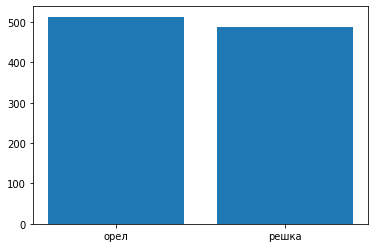

In [ ]:
names, frequencies = unique(choice(['орел', 'решка'], 1000), return_counts=True)

plt.bar(names, frequencies)
plt.show()

Важно сказать, что чем больше раз мы подкидываем монетку, тем статистически должен быть лучше результат:

10


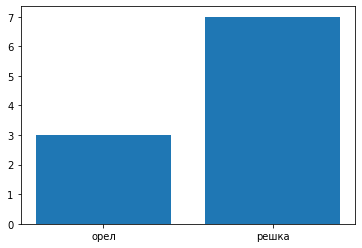

100


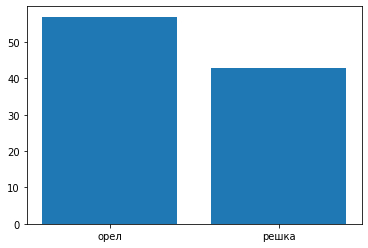

1000


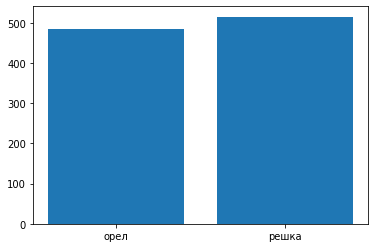

10000


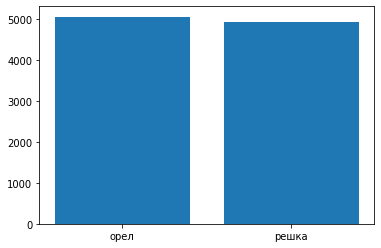

In [ ]:
for n in [10, 100, 1000, 10000]:
    names, frequencies = unique(choice(['орел', 'решка'], n), return_counts=True)
    print(n)
    plt.bar(names, frequencies)
    plt.show()

### Моделирование вероятностей

**Задача.** В урне 7 белых и 5 красных шаров. Из нее достают один шар и откладывают в сторону. Шар оказался белым. После этого из урны берут еще один шар. Какова вероятность того, что этот шар тоже будет белым?
$$
\frac{6}{11} = 0.(54)
$$

In [17]:
n = 100000
successes = 0
for i in range(n):
  white_red = [0]*6 + [1]*5
  first_try = white_red[np.random.randint(0, len(white_red))]
  if first_try == 0:
    successes += 1
print(successes/n)

0.54231


**Задача.**

В урне 7 белых и 5 красных шаров. Наудачу извлекается два шара. Какова вероятность, что извлеченные шары одного цвета?
$$
\frac{C_7^2 + C_5^2}{C_{12}^2} = \frac{31}{66} = 0.4(69)
$$

In [18]:
n = 1000000
successes = 0
for i in range(n):
  white_red = [0]*7 + [1]*5
  first_try = white_red[np.random.randint(0, len(white_red))]
  white_red.remove(first_try)
  second_try = white_red[np.random.randint(0, len(white_red))]
  if first_try == second_try:
    successes += 1
print(successes/n)

0.469353


**Задача.**

Колода в 52 карты делится наугад на две равные пачки по 26 листов. Найти вероятности событий:

a) A — «в каждой из пачек окажется два туза»

б) B — «в одной из пачек будет один туз, а в другой — три».
$$
a) \frac{C_4^2C_{48}^{24}}{C_{52}^{26}} = \frac{325}{833} \approx 0.390, \quad b) \frac{2C_4^1C_{48}^{25}}{C_{52}^{26}} = \frac{416}{833} \approx 0.499
$$

In [ ]:
n = 100000
successes = 0
for i in range(n):
  places = np.random.choice(list(range(1, 53)), 4, replace=False)
  places = np.sort(places)
  if (places[1] <= 26) & (places[2] > 26):
    successes += 1
print(successes / n)

0.38995


In [ ]:
n = 100000
successes = 0
for i in range(n):
  places = np.random.choice(list(range(1, 53)), 4, replace=False)
  places = np.sort(places)
  if ((places[0] <= 26) & (places[1] > 26)) | ((places[2] <= 26) & (places[3] > 26)):
    successes += 1
print(successes / n)

0.50105


**Задача.**

Ребенок, не умеющий читать, пытается составить из пяти карточек с буквами «б», «а», «н», «а», «н» слово банан. Какова вероятность, что у него это получится?
$$
\frac{2! \cdot 2!}{5!} = \frac{1}{30} = 0.0(3)
$$

In [ ]:
n = 100000
successes = 0
word = 'банан'
letters = list(word)
for i in range(n):
  letters = list(word)
  current_word = ''
  for j in range (len(letters)):
    current_symb = letters[np.random.randint(0, len(letters))]
    current_word += current_symb
    letters.remove(current_symb)
  if current_word == word:
    successes += 1
print(successes / n)

0.03399


**Задача.**

Пусть 10 человек случайным образом рассаживаются за круглый стол. Найти вероятность того, что два конкретных человека окажутся рядом.

$$
\frac{10 \cdot 2 \cdot 8!}{10!} = \frac{2}{9} \approx 0.(2)
$$

In [19]:
n = 100000
successes = 0
for i in range(n):
  indexes = np.random.choice(list(range(10)), 2, replace=False)
  if abs(indexes[0] - indexes[1]) == 1 or abs(indexes[0] - indexes[1]) == 9:
    successes += 1
print(successes / n) 

0.22207


**Задача.**

Пусть 10 человек случайным образом рассаживаются вдоль одного края прямоугольного стола. Найти вероятность того, что два конкретных человека окажутся рядом.

$$
\frac{8 \cdot 2 \cdot 8! + 2 \cdot 8!}{10!} = \frac{1}{5} = 0.2
$$

In [ ]:
n = 100000
successes = 0
for i in range(n):
  indexes = np.random.choice(list(range(10)), 2, replace=False)
  if (abs(indexes[0] - indexes[1]) == 1):
    successes += 1
print(successes / n) 

0.2008


**Задача.**

В лифт семиэтажного дома на первом этаже вошли четыре человека. Каждый из них может выйти с одинаковой вероятностью на любом этаже, начиная со второго. Найти вероятности событий:

а) А — «все пассажиры выйдут на третьем этаже»

б) В — «все пассажиры выйдут на одном и том же этаже»

в) С — «все пассажиры выйдут на разных этажах»


$$
a) \frac{1}{6^4} \approx 0.00077, \quad b) \frac{1}{6^3} \approx 0.0046, \quad c) \frac{10}{6^2} \approx 0.2(7).
$$



In [ ]:
n = 100000
successes = 0
for i in range(n):
  indexes = np.random.randint(2, 8, 4)
  if (indexes == 3).all():
    successes += 1
print(successes / n)

0.0008


In [ ]:
n = 100000
successes = 0
for i in range(n):
  indexes = np.random.randint(2, 8, 4)
  if len(unique(indexes)) == 1:
    successes += 1
print(successes / n)

0.00436


In [ ]:
n = 100000
successes = 0
for i in range(n):
  indexes = np.random.randint(2, 8, 4)
  if len(unique(indexes)) == 4:
    successes += 1
print(successes / n)

0.27658


### Условная вероятность

**Задача.**

Статистика запросов кредитов в банке такова: 10% — государственные организации, 20% — другие банки, 70% — физические лица. Вероятности того, что взятый кредит не будет возвращен равны 0.01, 0.05 и 0.2, соответственно.

1. Найти вероятность события A  — «случайным образом взятый кредит не возвращен»

2. Известно, что кредит не возвращен. Какова вероятность, что заемщик — банк?

$$
a) \ 0.01 \cdot 0.1 + 0.05 \cdot 0.2 + 0.2 \cdot 0.7 = 0.151, \quad b) \ \frac{0.01}{0.151} \approx 0.066.
$$

In [ ]:
n = 1000000
clients = [0]*10 + [1]*20 + [2]*70
bads = [0.01, 0.05, 0.2]
successes = 0
for i in range(n):
  index = np.random.randint(0, len(clients))
  successes += bads[clients[index]]
print(successes / n)

0.150921089999797


In [ ]:
n = 100000
successes = 0
credit_not_returned = {0: 0.01, 1: 0.05, 2: 0.2}
for _ in range(n):
  while True:
    client = np.random.choice([0, 1, 2], 1, p=[0.1, 0.2, 0.7])[0]
    is_credit_returned = np.random.choice([False, True], 1, p=[credit_not_returned[client], 1 - credit_not_returned[client]])[0]
    if not is_credit_returned:
      break
  if client == 1:
    successes += 1
print(successes / n)